In [1]:
# Import dependencies

import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

# Set up csv path
batter_path = Path("Resources/batters2023.csv")
pitcher_path = Path("Resources/pitchers2023.csv")

# Import csv files as dataframes
batter_df = pd.read_csv(batter_path)
pitcher_df = pd.read_csv(pitcher_path)


In [10]:
batter_df

qbatter_df = batter_df.loc[batter_df['AB']>= 100]

qbatter_df

,Player,Team,Pos,Age,G,AB,R,H,2B,3B,...,CS,BB,SO,SH,SF,HBP,AVG,OBP,SLG,OPS
0,Marcus Semien,TEX,2B,33,162,670,122,185,40,4,...,3,72,110,0,5,5,0.276,0.348,0.478,0.826
1,Julio Rodriguez,SEA,OF,23,155,654,102,180,37,2,...,10,47,175,0,2,11,0.275,0.333,0.485,0.818
2,Ronald Acuna,ATL,OF,26,159,643,149,217,35,4,...,14,80,84,0,3,9,0.337,0.416,0.596,1.012
3,Bobby Witt,KC,SS,23,158,641,97,177,28,11,...,15,40,121,1,8,4,0.276,0.319,0.495,0.814
4,Trea Turner,PHI,SS,30,155,639,102,170,35,5,...,0,45,150,0,1,6,0.266,0.320,0.459,0.779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,Rene Pinto,TB,C,27,39,103,10,26,3,0,...,0,2,34,0,0,0,0.252,0.267,0.456,0.723
453,David Fry,CLE,C,28,58,101,12,24,6,0,...,0,8,30,0,0,4,0.238,0.319,0.416,0.735
454,Alika Williams,PIT,SS,24,46,101,7,20,5,0,...,0,9,35,1,0,1,0.198,0.270,0.248,0.518
455,Ronny Mauricio,NYM,2B,22,26,101,11,25,4,0,...,0,7,31,0,0,0,0.248,0.296,0.347,0.643


In [6]:
# Generate a summary statistics table that shows data per team

# team

team = qbatter_df.groupby('Team')

# team hits mean

hits_mean = qbatter_df.groupby('Team').mean()['H']

## team homeruns mean

hr_mean = qbatter_df.groupby('Team').mean()['HR']

# sort hrs

sorted_hr = hr_mean.sort_values(ascending=[False])

## team rbis mean

rbi_mean = qbatter_df.groupby('Team').mean()['RBI']

# sort rbis

sorted_rbi = rbi_mean.sort_values(ascending=[False])

# team stolen bases mean

sb_mean = qbatter_df.groupby('Team').mean()['SB']

# caught stealing

cs_mean = qbatter_df.groupby('Team').mean()['CS']

# bases on balls

bb_mean = qbatter_df.groupby('Team').mean()['BB']

## strikeouts

so_mean = qbatter_df.groupby('Team').mean()['SO']

# sorted strikeouts

sorted_so = so_mean.sort_values(ascending=[False])

## BA

ba_mean = qbatter_df.groupby('Team').mean()['AVG']

# sorted BA

sorted_ba = ba_mean.sort_values(ascending=[False])

# OBP

obp_mean = qbatter_df.groupby('Team').mean()['OBP']

# SLG

slg_mean = qbatter_df.groupby('Team').mean()['SLG']


## OPS

ops_mean = qbatter_df.groupby('Team').mean()['OPS']

# sorted OPS

sorted_ops = ops_mean.sort_values(ascending=[False])



team_summary = pd.DataFrame({'Mean Hits': hits_mean,
                            'Mean Homeruns': hr_mean,
                            'Mean RBIS': rbi_mean,
                             'Mean Stolen Bases': sb_mean,
                            'Mean Caught Stealing': cs_mean,
                            'Mean Bases on Balls': bb_mean,
                             'Mean Strikeouts': so_mean,
                            'Mean Batting Average': ba_mean,
                            'Mean OBP': obp_mean,
                            'Mean SLG': slg_mean,
                            'Mean OPS': ops_mean})

team_summary


/var/folders/br/p0w3y3qn03dcsbdlblfvjywc0000gn/T/ipykernel_12461/4252185463.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  hits_mean = qbatter_df.groupby('Team').mean()['H']
/var/folders/br/p0w3y3qn03dcsbdlblfvjywc0000gn/T/ipykernel_12461/4252185463.py:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  hr_mean = qbatter_df.groupby('Team').mean()['HR']
/var/folders/br/p0w3y3qn03dcsbdlblfvjywc0000gn/T/ipykernel_12461/4252185463.py:21: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only

,Mean Hits,Mean Homeruns,Mean RBIS,Mean Stolen Bases,Mean Caught Stealing,Mean Bases on Balls,Mean Strikeouts,Mean Batting Average,Mean OBP,Mean SLG,Mean OPS
Team,,,,,,,,,,,
ARI,84.333333,10.733333,44.266667,10.666667,1.466667,33.466667,75.333333,0.242933,0.314667,0.386267,0.700933
ATL,134.272727,27.454545,80.545455,10.727273,2.272727,47.272727,109.454545,0.270091,0.335455,0.493182,0.828636
BAL,97.000000,12.928571,54.285714,8.000000,1.714286,34.714286,92.571429,0.256286,0.319714,0.419000,0.738714
BOS,83.375000,10.875000,43.187500,6.062500,1.375000,27.312500,76.875000,0.252250,0.311500,0.410687,0.722187
CHC,89.000000,12.266667,49.000000,9.066667,2.133333,36.066667,84.866667,0.248400,0.325133,0.405533,0.730667
CIN,75.941176,11.058824,41.235294,10.823529,2.647059,30.294118,81.176471,0.249412,0.324765,0.416941,0.741706
CLE,79.294118,7.294118,35.941176,8.823529,2.117647,27.058824,64.529412,0.236176,0.300235,0.369765,0.670000
COL,76.647059,9.176471,37.882353,4.352941,1.411765,25.411765,85.529412,0.247529,0.308706,0.396941,0.705647
CWS,87.285714,11.571429,40.928571,5.000000,1.428571,24.285714,90.285714,0.234786,0.286071,0.380714,0.666786


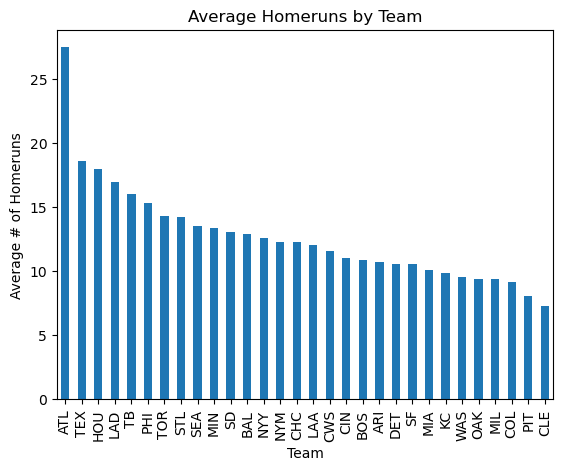

In [7]:
hr_chart = sorted_hr.plot(kind = 'bar',
                         xlabel = 'Team',
                         ylabel = 'Average # of Homeruns',
                         title = 'Average Homeruns by Team')

plt.show()

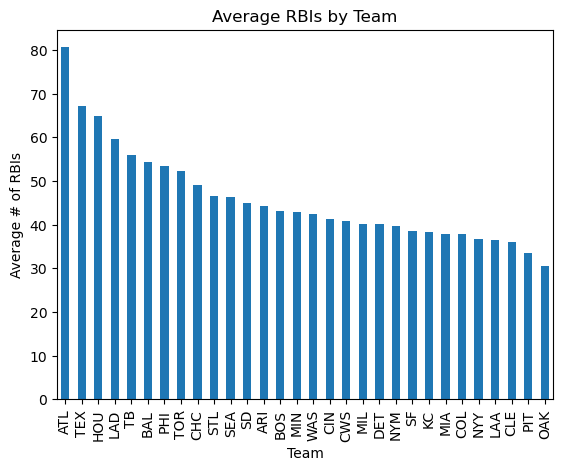

In [8]:
rbi_chart = sorted_rbi.plot(kind = 'bar',
                         xlabel = 'Team',
                         ylabel = 'Average # of RBIs',
                         title = 'Average RBIs by Team')

plt.show()

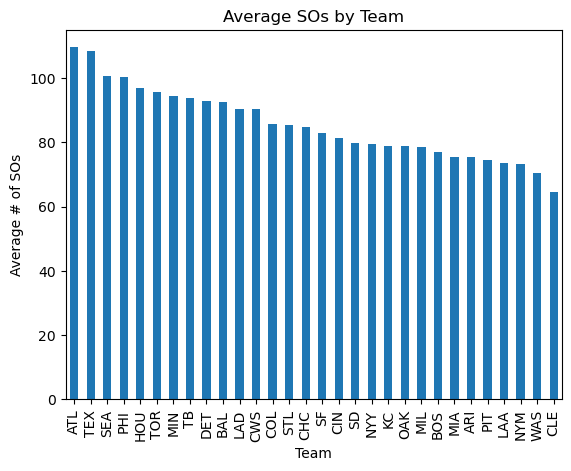

In [43]:
so_chart = sorted_so.plot(kind = 'bar',
                         xlabel = 'Team',
                         ylabel = 'Average # of SOs',
                         title = 'Average SOs by Team')

plt.show()

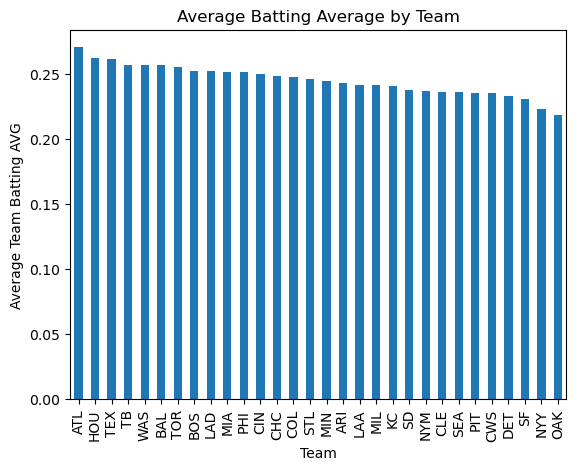

In [48]:
ba_chart = sorted_ba.plot(kind = 'bar',
                         xlabel = 'Team',
                         ylabel = 'Average Team Batting AVG',
                         title = 'Average Batting Average by Team')


plt.show()

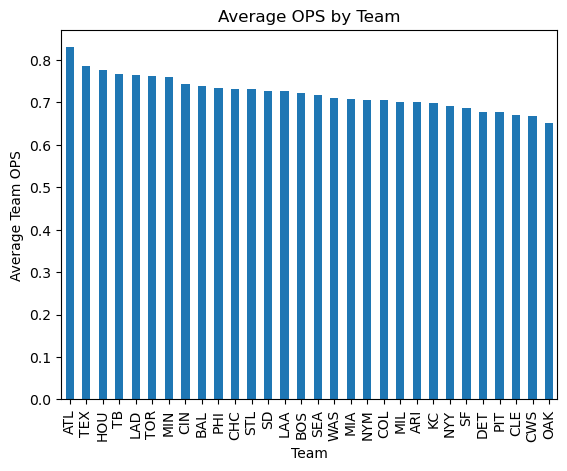

In [49]:
ops_chart = sorted_ops.plot(kind = 'bar',
                         xlabel = 'Team',
                         ylabel = 'Average Team OPS',
                         title = 'Average OPS by Team')


plt.show()

In [9]:
pitcher_df

qpitcher_df = pitcher_df.loc[pitcher_df['IP']>= 100]

qpitcher_df

,Player,Team,Age,G,GS,CG,SHO,IP,H,ER,K,BB,HR,W,L,SV,BS,HLD,ERA,WHIP
0,Logan Webb,SF,27,33,33,2,1,216.0,201,78,194,31,20,11,13,0,0,0,3.25,1.07
1,Zac Gallen,ARI,28,34,34,1,1,210.0,188,81,220,47,22,17,9,0,0,0,3.47,1.12
2,Gerrit Cole,NYY,33,33,33,2,2,209.0,157,61,222,48,20,15,4,0,0,0,2.63,0.98
3,Miles Mikolas,STL,35,35,35,0,0,201.1,226,107,137,39,26,9,13,0,0,0,4.78,1.32
4,Chris Bassitt,TOR,34,33,33,1,1,200.0,176,80,186,59,28,16,8,0,0,0,3.60,1.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,Paul Blackburn,OAK,30,21,20,0,0,103.2,117,51,104,43,11,4,7,0,1,0,4.43,1.54
119,Reese Olson,DET,24,21,18,0,0,103.2,83,46,103,33,14,5,7,0,0,1,3.99,1.12
120,Tony Gonsolin,LAD,29,20,20,0,0,103.0,86,57,82,40,19,8,5,0,0,0,4.98,1.22
121,Chris Sale,BOS,34,20,20,0,0,102.2,87,49,125,29,15,6,5,0,0,0,4.30,1.13


In [23]:
# Generate a summary statistics table that shows data per team

# team

team_pitch = qpitcher_df.groupby('Team')

# team ERA

era_mean = qpitcher_df.groupby('Team').mean()['ERA']

# sort ERA

sorted_era = era_mean.sort_values(ascending=[True])

# team WHIP

whip_mean = qpitcher_df.groupby('Team').mean()['WHIP']

# sort WHIP

sorted_whip = whip_mean.sort_values(ascending=[True])

# team Wins

w_mean = qpitcher_df.groupby('Team').mean()['W']

# sort Wins

sorted_w = w_mean.sort_values(ascending=[False])

team_pitch_summary = pd.DataFrame({"Mean ERA": era_mean,
                            "Mean WHIP": whip_mean,
                            "Mean W's": w_mean})

team_pitch_summary

/var/folders/br/p0w3y3qn03dcsbdlblfvjywc0000gn/T/ipykernel_12461/1264376190.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  era_mean = qpitcher_df.groupby('Team').mean()['ERA']
/var/folders/br/p0w3y3qn03dcsbdlblfvjywc0000gn/T/ipykernel_12461/1264376190.py:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  whip_mean = qpitcher_df.groupby('Team').mean()['WHIP']
/var/folders/br/p0w3y3qn03dcsbdlblfvjywc0000gn/T/ipykernel_12461/1264376190.py:25: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numer

,Mean ERA,Mean WHIP,Mean W's
Team,,,
ARI,4.023333,1.243333,12.333333
ATL,3.770000,1.266667,15.333333
BAL,3.934000,1.200000,10.800000
BOS,4.326000,1.214000,8.000000
CHC,3.940000,1.261667,9.333333
CIN,4.477500,1.347500,6.000000
CLE,3.530000,1.270000,7.666667
COL,5.265000,1.480000,7.500000
CWS,4.808000,1.384000,6.600000


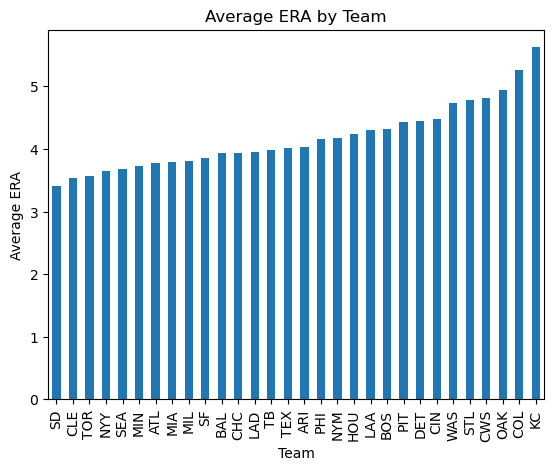

In [17]:
era_chart = sorted_era.plot(kind = 'bar',
                         xlabel = 'Team',
                         ylabel = 'Average ERA',
                         title = 'Average ERA by Team')

plt.show()

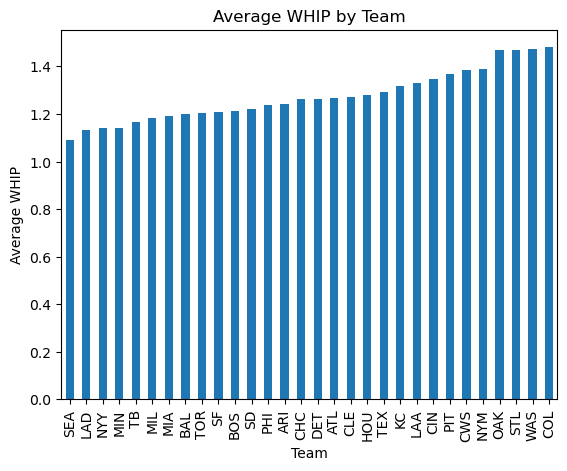

In [24]:
whip_chart = sorted_whip.plot(kind = 'bar',
                         xlabel = 'Team',
                         ylabel = 'Average WHIP',
                         title = 'Average WHIP by Team')

plt.show()

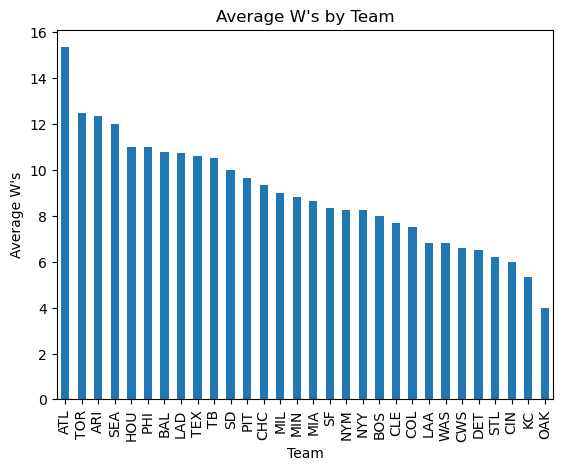

In [25]:
w_chart = sorted_w.plot(kind = 'bar',
                         xlabel = 'Team',
                         ylabel = "Average W's",
                         title = "Average W's by Team")

plt.show()